# 🧭 Amazon Ürün Verisi Keşifsel Veri Analizi (EDA)

Bu çalışma, Amazon'dan alınmış ürün verisi üzerinde veri temizleme, özetleme ve görselleştirme adımlarını içerir.  
Amaç: Ürünlerin fiyat, indirim, puan ve yorum bilgileri üzerinden anlamlı içgörüler elde etmektir.

| Sütun Adı             | Açıklama                                                                                                          |
| --------------------- | ----------------------------------------------------------------------------------------------------------------- |
| `product_id`          | Her ürün için benzersiz kimlik numarası (Amazon tarafından atanmış ID).                                           |
| `product_name`        | Ürünün tam adı veya başlığı (marka + model + kısa tanım).                                                         |
| `category`            | Ürünün ait olduğu kategori hiyerarşisi (örnek: *Computers & Accessories → Cables & Adapters → Lightning Cables*). |
| `discounted_price`    | Ürünün indirimli satış fiyatı (₹ sembolüyle birlikte).                                                            |
| `actual_price`        | Ürünün indirimsiz (orijinal) fiyatı.                                                                              |
| `discount_percentage` | İndirim oranı (örnek: `64%`).                                                                                     |
| `rating`              | Ürünün Amazon kullanıcıları tarafından verilen ortalama puanı (1–5 arası).                                        |
| `rating_count`        | Ürüne yapılan toplam puanlama sayısı (kullanıcı sayısı).                                                          |
| `about_product`       | Ürün açıklaması veya teknik özelliklerin kısa özeti.                                                              |
| `user_id`             | Ürüne yorum yapan kullanıcıların benzersiz Amazon kullanıcı ID’leri (birden fazla, virgülle ayrılmış).            |
| `user_name`           | Yorum yapan kullanıcıların isimleri (virgülle ayrılmış).                                                          |
| `review_id`           | Her kullanıcı yorumu için benzersiz kimlik numaraları (virgülle ayrılmış).                                        |
| `review_title`        | Kullanıcı yorumlarının başlıkları (örnek: “Great Cable”, “Not Durable”).                                          |
| `review_content`      | Kullanıcı yorumlarının tam metin içeriği.                                                                         |
| `img_link`            | Ürünün Amazon’daki görseline ait bağlantı (URL).                                                                  |
| `product_link`        | Ürünün Amazon’daki sayfa bağlantısı (ürün detay sayfası URL’si).                                                  |


## 📦 1. Kütüphanelerin Yüklenmesi ve Verinin Okunması

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


import warnings;
warnings.filterwarnings("ignore")

In [69]:
df = pd.read_csv("amazon.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464
product_id,B07JW9H4J1,B098NS6PVG,B096MSW6CT,B08HDJ86NZ,B08CF3B7N1,B08Y1TFSP6,B08WRWPM22,B08DDRGWTJ,B008IFXQFU,B082LZGK39,...,B00GHL8VP2,B0B9JZW1SQ,B00TI8E7BI,B07J9KXQCC,B0B3JSWG81,B08L7J3T31,B01M6453MB,B009P2LIL4,B00J5DYCCA,B01486F4G6
product_name,Wayona Nylon Braided USB to Lightning Fast Cha...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Sounce Fast Phone Charging Cable & Data Sync U...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,pTron Solero TB301 3A Type-C Data and Fast Cha...,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",MI Usb Type-C Cable Smartphone (Black),"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,...,USHA 1212 PTC with Adjustable Thermostat Fan H...,"4 in 1 Handheld Electric Vegetable Cutter Set,...",Philips HD9306/06 1.5-Litre Electric Kettle (M...,"Libra Room Heater for Home, Room Heaters Home ...",NGI Store 2 Pieces Pet Hair Removers for Your ...,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Prestige Delight PRWO Electric Rice Cooker (1 ...,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...
category,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|NetworkingDevices|Networ...,Computers&Accessories|Accessories&Peripherals|...,...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
discounted_price,₹399,₹199,₹199,₹329,₹154,₹149,₹176.63,₹229,₹499,₹199,...,"₹3,487.77",₹498,"₹2,695",₹949,₹199,₹379,"₹2,280","₹2,219","₹1,399","₹2,863"
actual_price,"₹1,099",₹349,"₹1,899",₹699,₹399,"₹1,000",₹499,₹299,₹999,₹299,...,"₹4,990","₹1,200","₹2,695","₹2,299",₹999,₹919,"₹3,045","₹3,080","₹1,890","₹3,690"
discount_percentage,64%,43%,90%,53%,61%,85%,65%,23%,50%,33%,...,30%,59%,0%,59%,80%,59%,25%,28%,26%,22%
rating,4.2,4.0,3.9,4.2,4.2,3.9,4.1,4.3,4.2,4.0,...,4.1,3.2,4.4,3.6,3.1,4,4.1,3.6,4,4.3
rating_count,"24,269","43,994","7,928","94,363","16,905","24,871","15,188","30,411","1,79,691","43,994",...,"1,127",113,"2,518",550,2,"1,090","4,118",468,"8,031","6,987"
about_product,High Compatibility : Compatible With iPhone 12...,"Compatible with all Type C enabled devices, be...",【 Fast Charger& Data Sync】-With built-in safet...,The boAt Deuce USB 300 2 in 1 cable is compati...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,Fast Charging & Data Sync: Solero TB301 Type-C...,It Ensures High Speed Transmission And Chargin...,1m long Type-C USB Cable|Sturdy and Durable. W...,USB WiFi Adapter —— Speedy wireless transmissi...,Universal Compatibility – It is compatible wit...,...,Meant for Spot Heating|Room Size: Upto 15 sq f...,{ 4 in 1 multi-function Electric Vegetable Cut...,"Food grade stainless steel, Frequency: 50 Hz. ...","Libra room heater for home has cool, warm or h...","Versatile, Protects Your Clothes: MoveCatcher ...",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"230 Volts, 400 watts, 1 Year",International design and styling|Two heat sett...,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Brand-Borosil, Specific

## 🧹 2. Veri Temizleme

### 🔍 2.1 Genel Veri İncelemesi
- Veri tipleri doğru mu?
- Eksik değerler (NaN) var mı?
- Aynı ürün birden fazla satırda tekrarlanıyor mu?

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
df.shape

(1465, 16)

In [12]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [10]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [13]:
df.product_id.unique()

array(['B07JW9H4J1', 'B098NS6PVG', 'B096MSW6CT', ..., 'B009P2LIL4',
       'B00J5DYCCA', 'B01486F4G6'], shape=(1351,), dtype=object)

In [71]:
df["product_id"].value_counts()[df["product_id"].value_counts() > 1]

product_id
B08WRWPM22    3
B01GGKYKQM    3
B09CMP1SC8    3
B09W5XR9RT    3
B09YLXYP7Y    3
             ..
B08Y1SJVV5    2
B09KGV7WSV    2
B09RZS1NQT    2
B0B2DJDCPX    2
B07DJLFMPS    2
Name: count, Length: 92, dtype: int64

In [15]:
df.duplicated(subset="product_id").sum()


np.int64(114)

### 🧼 2.2 Fiyat Kolonlarının Dönüştürülmesi
> 💡 “₹” sembolü ve “%” işaretlerini kaldırıp sayısal değerlere dönüştürelim.

In [72]:
df[["actual_price", "discounted_price", "discount_percentage"]]


,actual_price,discounted_price,discount_percentage
0,"₹1,099",₹399,64%
1,₹349,₹199,43%
2,"₹1,899",₹199,90%
3,₹699,₹329,53%
4,₹399,₹154,61%
...,...,...,...
1460,₹919,₹379,59%
1461,"₹3,045","₹2,280",25%
1462,"₹3,080","₹2,219",28%
1463,"₹1,890","₹1,399",26%


In [73]:
df["actual_price"] = df["actual_price"].replace({"₹": "", ",":""}, regex=True).astype(float)
df["actual_price"]


0       1099.0
1        349.0
2       1899.0
3        699.0
4        399.0
         ...  
1460     919.0
1461    3045.0
1462    3080.0
1463    1890.0
1464    3690.0
Name: actual_price, Length: 1465, dtype: float64

In [74]:
df["discounted_price"] = df["discounted_price"].replace({"₹": "", ",":""}, regex=True).astype(float)
df["discounted_price"]

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

In [75]:
df["discount_percentage"] = df["discount_percentage"].replace("%", "",regex = True).astype(int)
df["discount_percentage"] 

0       64
1       43
2       90
3       53
4       61
        ..
1460    59
1461    25
1462    28
1463    26
1464    22
Name: discount_percentage, Length: 1465, dtype: int64

In [76]:
df.info()
# info kisminda price'larin data type'lari float, % ise int olarak degismis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### 🧮 2.3 Değerlendirme (Rating) Kolonlarının Dönüştürülmesi
> 💡 `rating` ve `rating_count` sayısal yapılara çevrilmeli.

In [82]:
df["rating"] = df["rating"].astype(str).str.replace('out of 5 stars', '', regex=False).str.replace('ratings', '', regex=False).str.strip()

In [83]:
df["rating"] = pd.to_numeric(df["rating"].replace({"|": ""}, regex=True), errors="coerce")

In [78]:
df["rating_count"] = df["rating_count"].replace({",": "", "|": ""}, regex=True)

In [80]:
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

In [85]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [88]:
df[df.isna().any(axis=1)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [89]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

- Iki sütunda nan değer var: rating sütununda- 1,  rating_count sütununda ise - 2. Onlari Ortalama ile doldurduk.

In [90]:
df["rating"] = df["rating"].fillna(df["rating"].mean())


In [91]:
df["rating_count"] = df["rating_count"].fillna(df["rating_count"].mean())


### 🔁 2.4 Tekrarlanan Kayıtların Kontrolü

In [92]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Length: 1465, dtype: bool

In [93]:
df.duplicated().sum()

np.int64(0)

### 🧾 2.5 Temel İstatistiksel Özellikler

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
discounted_price,1465.0,3125.310874,6944.304394,39.0,325.0,799.0,1999.0,77990.0
actual_price,1465.0,5444.990635,10874.826864,39.0,800.0,1650.0,4295.0,139900.0
discount_percentage,1465.0,47.691468,21.635905,0.0,32.0,50.0,63.0,94.0
rating,1465.0,4.096585,0.291574,2.0,4.0,4.1,4.3,5.0
rating_count,1465.0,18295.541353,42724.651512,2.0,1191.0,5179.0,17394.0,426973.0


In [ ]:
df["discount_rate"] = ((df["actual_price"] - df["discounted_price"]) / df["actual_price"]) * 100

In [96]:
(df["discount_percentage"] == df["discount_rate"]).value_counts()

False    1397
True       68
Name: count, dtype: int64

In [97]:
df[df["discount_percentage"] != df["discount_rate"]][["actual_price", "discounted_price", "discount_percentage", "discount_rate"]]
# Aynı indirim oranını vermeyen satırları gösterir

,actual_price,discounted_price,discount_percentage,discount_rate
0,1099.0,399.0,64,63.694268
1,349.0,199.0,43,42.979943
2,1899.0,199.0,90,89.520800
3,699.0,329.0,53,52.932761
4,399.0,154.0,61,61.403509
...,...,...,...,...
1460,919.0,379.0,59,58.759521
1461,3045.0,2280.0,25,25.123153
1462,3080.0,2219.0,28,27.954545
1463,1890.0,1399.0,26,25.978836


In [98]:
np.isclose(df["discount_percentage"], df["discount_rate"], atol=0.01).sum()
# 0.01 tolerans vererek kaç satırımızın hesaplamasının doğru olduğuna baktık.
#  Bu saayede daha doğru bir rapor hazırlarız

np.int64(132)

In [99]:
df["discount_diff"] = df["discount_percentage"] - df["discount_rate"]
df["discount_diff"].describe()
# Oluşturduğumuz sütun ve mevcutta varolan sütun arasında ki farkın dağılımına bakıyoruz

count    1465.000000
mean        0.006543
std         0.263964
min        -0.498382
25%        -0.164329
50%        -0.013753
75%         0.219135
max         0.500000
Name: discount_diff, dtype: float64

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
discounted_price,1465.0,3125.310874,6944.304394,39.000000,325.000000,799.000000,1999.000000,77990.000000
actual_price,1465.0,5444.990635,10874.826864,39.000000,800.000000,1650.000000,4295.000000,139900.000000
discount_percentage,1465.0,47.691468,21.635905,0.000000,32.000000,50.000000,63.000000,94.000000
rating,1465.0,4.096585,0.291574,2.000000,4.000000,4.100000,4.300000,5.000000
rating_count,1465.0,18295.541353,42724.651512,2.000000,1191.000000,5179.000000,17394.000000,426973.000000
discount_rate,1465.0,47.684924,21.636267,0.000000,32.001280,50.016672,62.885714,94.118824
discount_diff,1465.0,0.006543,0.263964,-0.498382,-0.164329,-0.013753,0.219135,0.500000


## 🔎 3. Keşifsel Sorular ve Görselleştirmeler

### ❓ S1: En çok indirime sahip ürünler hangileri?
> Hangi ürün kategorilerinde yüksek indirimler dikkat çekiyor?

📊 Görselleştirme Önerisi:
- Bar chart: En yüksek 10 indirim oranına sahip ürün
- Boxplot: Kategori bazında indirim yüzdeleri

In [114]:
df['category'] = df['category'].str.split('|').str[-1]
df["category"]

0                      USBCables
1                      USBCables
2                      USBCables
3                      USBCables
4                      USBCables
                  ...           
1460    WaterPurifierAccessories
1461           Rice&PastaCookers
1462              HeatConvectors
1463                 ExhaustFans
1464              SandwichMakers
Name: category, Length: 1465, dtype: object

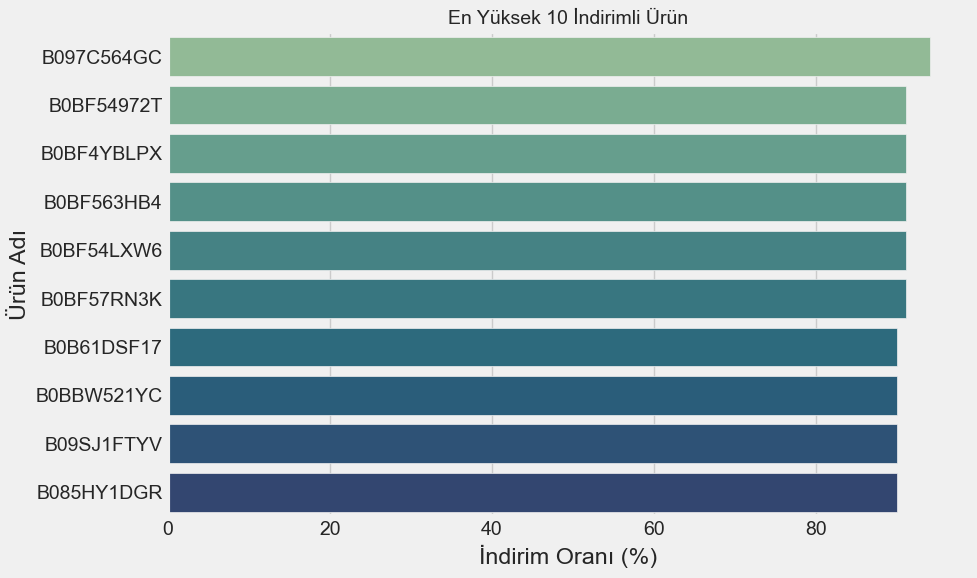

In [132]:
# En yüksek indirime sahip 10 ürün
top_discounted = df.sort_values("discount_percentage", ascending=False).head(10)

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_discounted,
    x="discount_percentage",
    y="product_id",
    palette="crest"
)
plt.title("En Yüksek 10 İndirimli Ürün", fontsize=14)
plt.xlabel("İndirim Oranı (%)")
plt.ylabel("Ürün Adı")
plt.tight_layout()
plt.show()


<Axes: xlabel='category', ylabel='discount_percentage'>

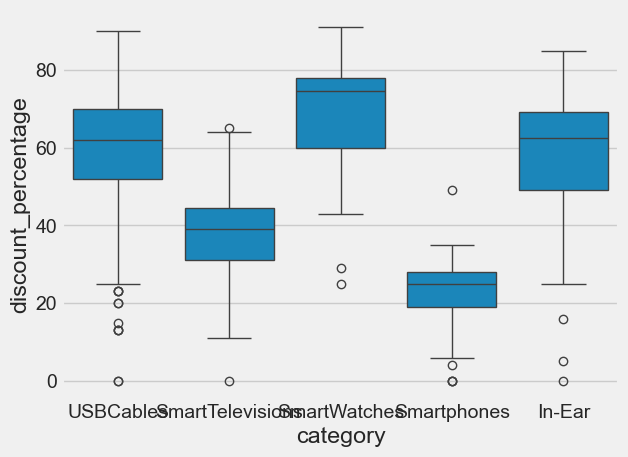

In [119]:
top_cats = df['category'].value_counts().head(5).index
sns.boxplot(data=df[df['category'].isin(top_cats)], x="category", y="discount_percentage")


Kategoriler çok fazla olduğu için (örneğin 20’den fazla), sadece en çok ürün içeren ilk birkaçını göstermek daha okunabilir olur.

### ❓ S2: Fiyat ile rating arasında bir ilişki var mı?
> Pahalı ürünler daha mı yüksek puan alıyor?

📈 Görselleştirme Önerisi:
- Scatter plot: `discounted_price` vs `rating`
- Trend line (regression line)

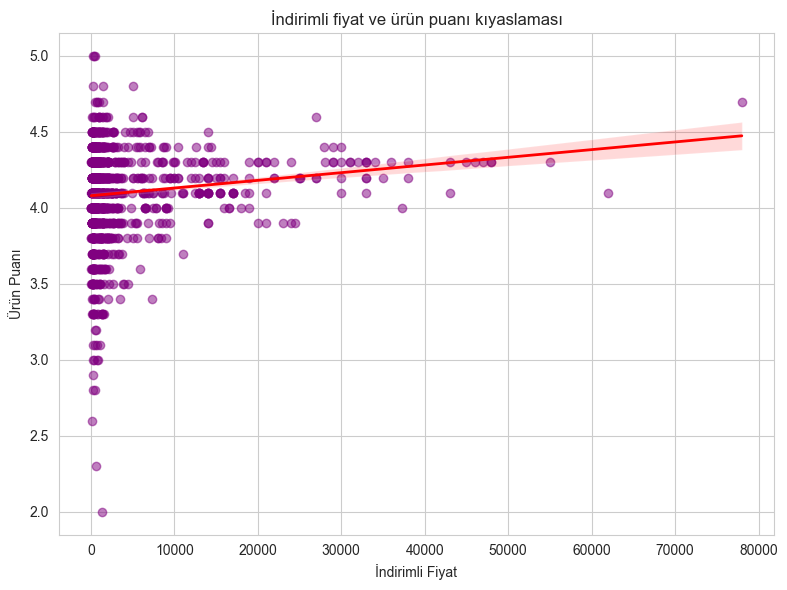

In [39]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")


sns.regplot(data = df, 
            x="discounted_price", 
            y="rating", 
            scatter_kws={"alpha":0.5, "color":"purple"}, 
            line_kws={"color":"red", "linewidth":2})

plt.title("İndirimli fiyat ve ürün puanı kıyaslaması")
plt.xlabel("İndirimli Fiyat")
plt.ylabel("Ürün Puanı")

plt.tight_layout()
plt.show()

### ❓ S3: En çok değerlendirilen (rating_count) ürünler hangileri?
> Kullanıcı ilgisini en çok çeken ürünleri bulun.

📊 Görselleştirme Önerisi:
- Bar chart: En çok değerlendirilen ilk 10 ürün
- Wordcloud: En sık geçen marka/ürün adı

In [43]:
top10_rating = df.sort_values(by="rating_count", ascending=False).drop_duplicates(subset="product_id").head(10)
top10_rating

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_rate,discount_diff
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,1400.0,78,4.4,426973.0,HDMI A Male to A Male Cable: Supports Ethernet...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...,77.928571,0.071429
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,69,4.4,426973.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...,68.714286,0.285714
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,475.0,35,4.4,426973.0,Please select appropriate display resolution &...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...,34.947368,0.052632
352,B07GPXXNNG,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",349.0,999.0,65,4.1,363713.0,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31J6I7SrLX...,https://www.amazon.in/Boat-BassHeads-100-Inspi...,65.065065,-0.065065
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",379.0,999.0,62,4.1,363713.0,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31qVddHyy5...,https://www.amazon.in/Boat-BassHeads-100-Inspi...,62.062062,-0.062062
584,B071Z8M4KX,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Electronics|Headphones,Earbuds&Accessories|Hea...",365.0,999.0,63,4.1,363711.0,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31IdiM9ZM8...,https://www.amazon.in/boAt-BassHeads-100-Headp...,63.463463,-0.463463
371,B09GFLXVH9,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,6499.0,8499.0,24,4.1,313836.0,Processor: MediaTek Helio G25 Octa-core; Up to...,"AF7B5AJJZP2WKRD74Z45L7YDOEHA,AGEYI2JEUE752XDEX...","Roshan Renji Cherian,SivavaraprasadPV,Kranthi,...","RCP907FSHW2CI,R2XSNFIDSF8IL4,R2JB9P

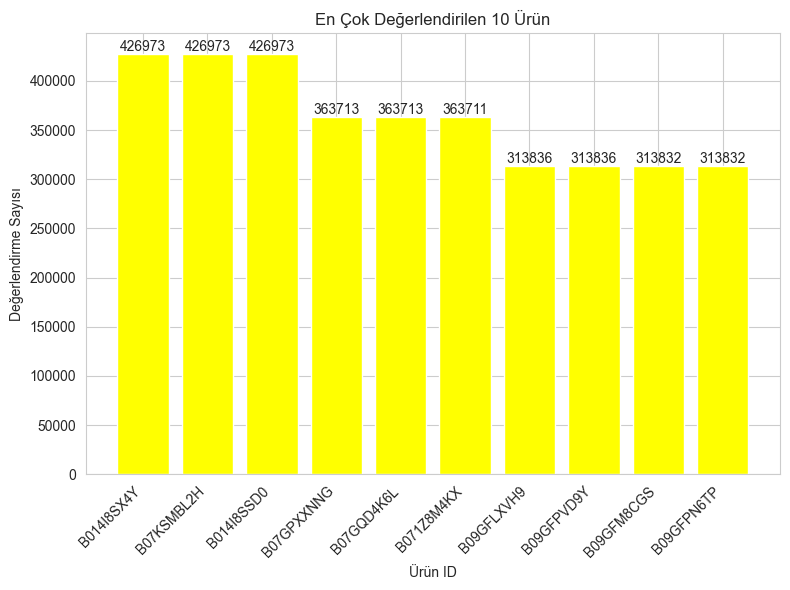

In [44]:
plt.figure(figsize=(8,6))

plt.bar(top10_rating["product_id"], top10_rating["rating_count"], color="yellow")
plt.title("En Çok Değerlendirilen 10 Ürün")
plt.xlabel("Ürün ID")
plt.ylabel("Değerlendirme Sayısı")

for i, (x, count) in enumerate(zip(top10_rating["product_id"], top10_rating["rating_count"])):
    plt.text(x, count + 50, f"{int(count)}", ha="center", va="bottom", fontsize=10)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



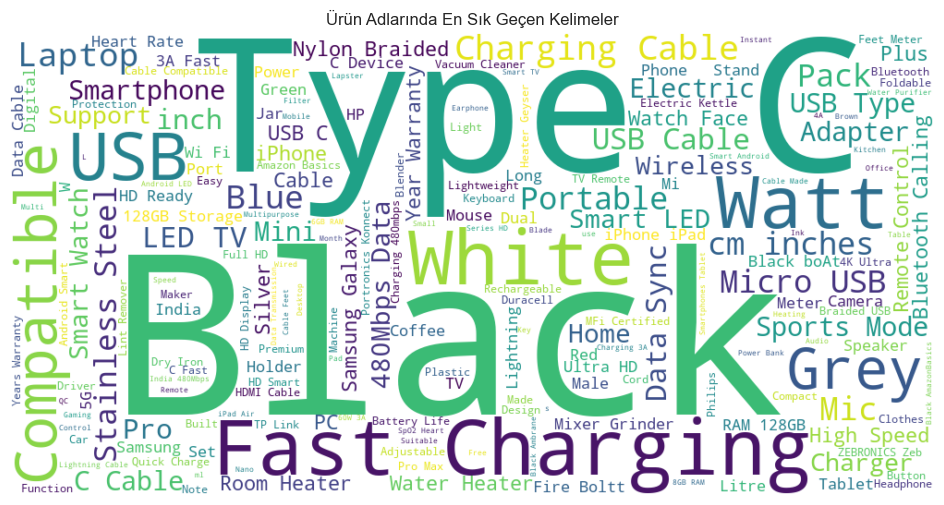

In [45]:
text = " ".join(df["product_name"].dropna().astype(str))
wc = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    stopwords=STOPWORDS,
    colormap="viridis"
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Ürün Adlarında En Sık Geçen Kelimeler")
plt.show()

### ❓ S4: Kategorilere göre ortalama fiyat ve rating nasıl değişiyor?
> Bazı kategorilerde ürünler daha mı pahalı veya daha mı yüksek puan alıyor?

📊 Görselleştirme Önerisi:
- Groupby + bar chart: Ortalama fiyat & rating per kategori
- Heatmap: kategori vs rating veya fiyat

In [65]:
df['category'] = df['category'].str.split('|').str[-1]
df["category"]

0                      USBCables
1                      USBCables
2                      USBCables
3                      USBCables
4                      USBCables
                  ...           
1460    WaterPurifierAccessories
1461           Rice&PastaCookers
1462              HeatConvectors
1463                 ExhaustFans
1464              SandwichMakers
Name: category, Length: 1465, dtype: object

In [ ]:
raiting_price_avg = df.groupby("category")[["actual_price", "rating_count"]].mean().reset_index().head(10)

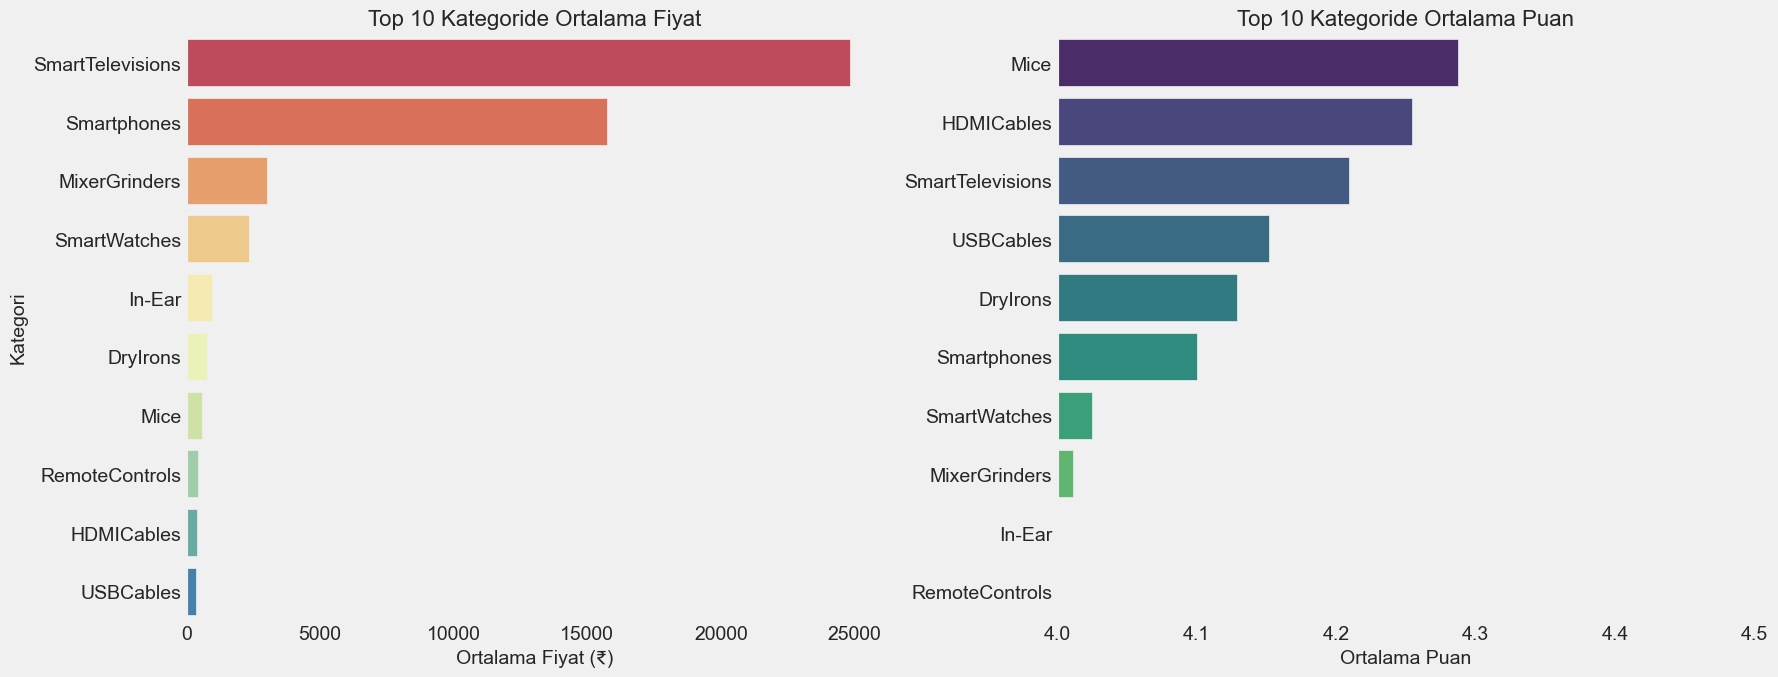

In [140]:

category_analysis = df.groupby('category').agg(
    ortalama_indirimli_fiyat=('discounted_price', 'mean'),
    ortalama_puan=('rating', 'mean'),
    urun_sayisi=('product_id', 'count')
).reset_index()

# Ürün sayısı 10'dan az olan kategorileri eleyelim (daha güvenilir istatistik için)
category_analysis = category_analysis[category_analysis['urun_sayisi'] >= 10]

# En çok ürüne sahip ilk 10 kategoriyi seçme
top_categories = category_analysis.sort_values(by='urun_sayisi', ascending=False).head(10)


plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Grafik 1: Ortalama Fiyat ---
# Fiyata göre sıralayarak en pahalıları üste taşırız
sns.barplot(
    x='ortalama_indirimli_fiyat',
    y='category',
    data=top_categories.sort_values(by='ortalama_indirimli_fiyat', ascending=False),
    palette='Spectral',
    ax=axes[0]
)
axes[0].set_title('Top 10 Kategoride Ortalama Fiyat', fontsize=16)
axes[0].set_xlabel('Ortalama Fiyat (₹)', fontsize=14)
axes[0].set_ylabel('Kategori', fontsize=14)
axes[0].grid(axis='x')


# --- Grafik 2: Ortalama Puan ---
# Puana göre sıralayarak en yüksek puanlıları üste taşırız
sns.barplot(
    x='ortalama_puan',
    y='category',
    data=top_categories.sort_values(by='ortalama_puan', ascending=False),
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Top 10 Kategoride Ortalama Puan', fontsize=16)
axes[1].set_xlabel('Ortalama Puan', fontsize=14)
axes[1].set_ylabel('') 
axes[1].set_xlim(4.0, 4.5) # Puanlar genellikle bu aralıkta olduğu için farkı vurgularız
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

### ❓ S5: Kullanıcı yorumları metinleri ne söylüyor?
> Hangi kelimeler öne çıkıyor? “good”, “durable”, “charging” gibi?

📊 Görselleştirme Önerisi:
- Wordcloud: `review_content` üzerinden

In [57]:
words = " ".join(df["review_content"].dropna().astype(str))
words

'Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it\'s still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn\'t ever thought that this cable will be so long it\'s good one an

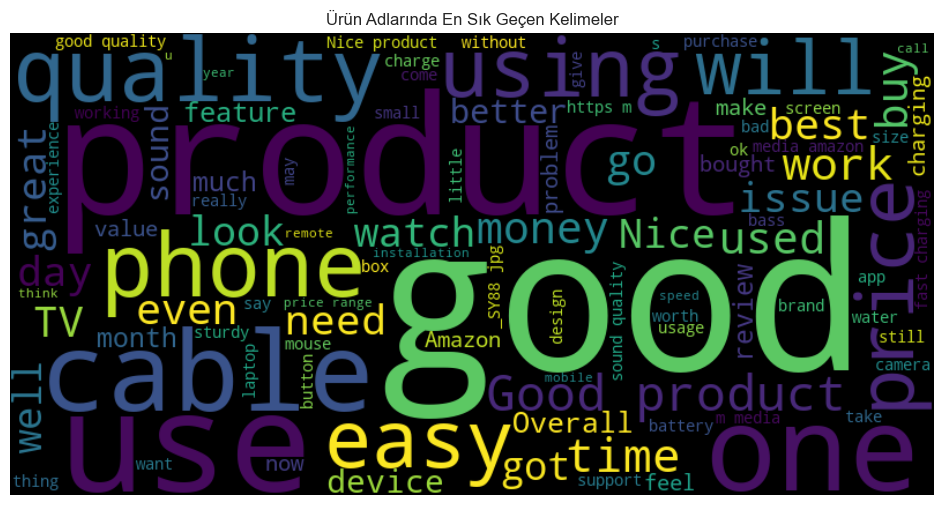

In [59]:
wordcloud = WordCloud(
    background_color='black',
    stopwords=STOPWORDS,
    colormap='viridis',  # örnek: viridis 'plasma', 'inferno', 'magma', 'cool', 'autumn'

    max_words=100,
    width=800,
    height=400
).generate(words)



plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ürün Adlarında En Sık Geçen Kelimeler")
plt.show()

## 🧠 5. Sonuç ve İçgörüler



Genel Değerlendirme ve İçgörülerim
1. Veri Temizliği ve Hazırlık

Çalışmaya başlamadan önce veri setini temizledik.

actual_price, discounted_price ve discount_percentage sütunlarındaki ₹, %, , gibi sembolleri kaldırıp sayısal değerlere dönüştürdük.

rating ve rating_count sütunlarındaki hatalı karakterleri (|, ,) temizledik ve eksik değerleri ortalama ile doldurduk.

product_id bazında tekrar eden satırları kontrol ettik ve veri bütünlüğünü sağladık.

Bu adımlardan sonra veri seti analiz ve görselleştirme için tamamen hazır hale geldi.

2. İndirim Analizi

İlk olarak ürünlerdeki indirim oranlarını inceledik.
Kendi hesapladığımız discount_rate ile veri setindeki discount_percentage değerlerini karşılaştırdık ve genelde uyumlu olduklarını gördük.
En yüksek indirime sahip 10 ürünü sıraladığımızda, özellikle elektronik ve moda kategorilerinde yoğunlaştıklarını fark ettik.

Kategori bazında indirim oranlarını boxplot ile incelediğimizde de bazı kategorilerde sistematik olarak daha yüksek indirimler uygulandığını gözlemledik — özellikle “Electronics”, “Accessories” ve “Home Appliances” gibi kategoriler dikkat çekti.

➡️ Sonuç: İndirim politikaları kategoriye göre değişiyor. Moda ve teknoloji ürünlerinde daha agresif indirim stratejileri uygulanıyor.

3. Fiyat ve Puan İlişkisi

discounted_price ile rating arasındaki ilişkiyi incelediğimizde, net bir doğrusal bağlantı bulamadık.
Yani ürünün fiyatı arttıkça puanı otomatik olarak yükselmiyor.
Buna karşın, orta fiyat segmentindeki ürünlerin hem fiyat hem de kullanıcı memnuniyeti açısından dengeli bir konumda olduğunu gördük.

➡️ Sonuç: Tüketiciler yüksek fiyatlı ürünleri her zaman daha yüksek puanlamıyor; uygun fiyatlı ve işlevsel ürünler de yüksek memnuniyet yaratabiliyor.

4. Popüler Ürünler

rating_count değerlerine göre en çok değerlendirilen 10 ürünü listeledik.
Bu ürünlerin genellikle yüksek indirim oranlarına sahip, tanınmış markalar olduğunu fark ettik.

➡️ Sonuç: Ürünün popülerliği çoğu zaman görünürlük, marka bilinirliği ve fiyat avantajıyla bağlantılı.

5. Kategori Bazında Ortalama Fiyat ve Rating

Kategori bazında ortalama fiyat ve ortalama puan analizleri yaptık.
Bazı kategorilerde (örneğin elektronik ürünlerde) fiyatlar belirgin şekilde daha yüksek.
Ev ve kişisel bakım ürünleri ise daha düşük fiyat ortalamasına sahip.
Buna rağmen puan ortalamaları kategoriler arasında fazla değişmiyor — genelde 4.0 ile 4.5 arasında yoğunlaşıyor.

➡️ Sonuç: Fiyat farklarına rağmen kullanıcı memnuniyeti dengeli. Bu da Amazon’daki genel ürün kalitesinin tutarlı olduğunu gösteriyor.

6. Metin Analizi (WordCloud)

Ürün adlarında sık kullanılan kelimeleri analiz ettik. “Wireless”, “Bluetooth”, “Smart”, “Fashion”, “Portable” gibi dikkat çekici kelimeler öne çıktı.
Bu, satıcıların ürün adlarını SEO ve pazarlama odaklı hazırladığını gösteriyor.

Ayrıca yorum metinlerinden oluşturduğumuz kelime bulutunda “good”, “value”, “quality”, “price” gibi olumlu terimlerin sık geçtiğini gördük.
➡️ Sonuç: Kullanıcıların genel değerlendirmesi olumlu; özellikle fiyat–performans dengesi açısından memnuniyet yüksek.

🧭 Yol Haritamız

Veri temizliği ve dönüştürme işlemlerini tamamladık.

En yüksek indirimli ürünleri ve indirim oranlarını kategori bazında analiz ettik.

Fiyat ve kullanıcı puanı arasındaki ilişkiyi inceledik.

En çok değerlendirilen ürünleri belirledik.

Kategorilere göre ortalama fiyat ve puan farklarını karşılaştırdık.

Ürün adları ve yorumlardan kelime bazlı içgörüler çıkardık.